In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sys

sys.path.append(os.path.abspath("../../"))
from dataset import DS_NAMES
from dataset import DS_DIMENSIONS
from utilities.figure_tools import get_latest_results_directory, make_fig_directory, load_results

In [2]:
run_id, run_path = get_latest_results_directory("../../results/vary-ntrees")
fig_output_path = make_fig_directory(run_id)
found_ds, results = load_results(run_path, group_fields=["explainer", "n_trees"])
print("Generating figures for run-{:03d}".format(run_id))
print("Datasets included:")
for ds in found_ds:
    print("\t", ds)

Generating figures for run-006
Datasets included:
	 cancer
	 glass
	 magic
	 spambase
	 vertebral


In [3]:
cmap = plt.get_cmap("Set1")
colors = cmap.colors

In [4]:
all_results = pd.DataFrame(columns=["dataset", "explainer", "n_samples", "n_samples_explained", "n_features", "accuracy", "precision", "recall", "f1", "avg_nnodes", "avg_nleaves", "avg_depth", "q", "jaccard", "coverage_ratio", "mean_distance", "mean_length", "runtime", "clique_size", "init_time", "sample_runtime", "mdr", "n_trees"])

for ds in found_ds:
    results[ds]["sample_runtime"] = results[ds].runtime / results[ds].n_samples_explained * 1000
    results[ds]["init_time"] = results[ds]["init_time"]
    results[ds]["mdr"] = results[ds].mean_distance / np.sqrt(results[ds].n_features) * 100

for ds in found_ds:
    for index, row in results[ds].iterrows():
        row["dataset"] = ds
        all_results = all_results.append(row)

In [5]:
all_results[["dataset", "n_trees", "mdr", "f1"]]

,dataset,n_trees,mdr,f1
0,cancer,5,3.944695,0.909091
1,cancer,10,4.565561,0.933333
2,cancer,15,3.994501,0.888889
3,cancer,20,5.412278,0.900000
4,cancer,25,6.721065,0.941176
...,...,...,...,...
15,vertebral,80,5.891505,0.787879
16,vertebral,85,5.087848,0.720000
17,vertebral,90,7.538670,0.814815
18,vertebral,95,6.403687,0.896552


In [6]:
def render_plot(xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None):
    plt.figure()

    for i in range(len(found_ds)):
        ds = found_ds[i]
        is_ds = all_results["dataset"] == ds
        plt.plot(all_results[is_ds][xfeature], all_results[is_ds][yfeature], label=ds, lw=2.0)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc="best")
    if xrange is not None:
        plt.xlim(xrange)
    if yrange is not None:
        plt.ylim(yrange)
    if save_name is not None:
        plt.savefig(fig_output_path + "/" + save_name, bbox_inches="tight")

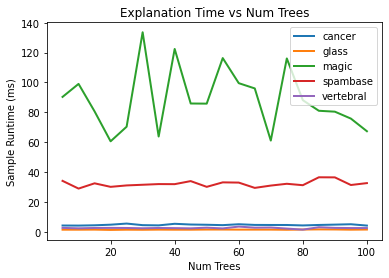

In [7]:
# sample time vs number of trees
render_plot("n_trees", "sample_runtime", "Num Trees", "Sample Runtime (ms)", "Explanation Time vs Num Trees", save_name="runtime_ntrees.png")

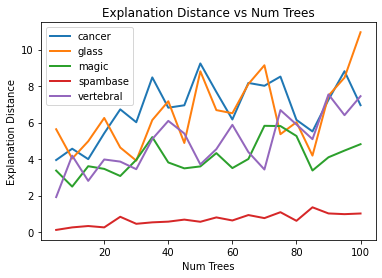

In [8]:
render_plot("n_trees", "mdr", "Num Trees", "Explanation Distance", "Explanation Distance vs Num Trees", "distance_ntrees.png")

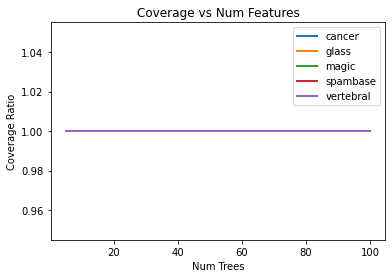

In [9]:
# Coverage vs Number of Trees
render_plot("n_trees", "coverage_ratio", "Num Trees", "Coverage Ratio", "Coverage vs Num Features", "/coverage_ntrees.png")

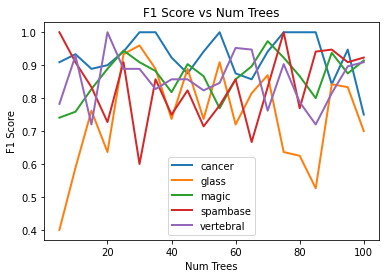

In [10]:
# F1 Score vs Num Trees
render_plot("n_trees", "f1", "Num Trees", "F1 Score", "F1 Score vs Num Trees", "f1_ntree.png")

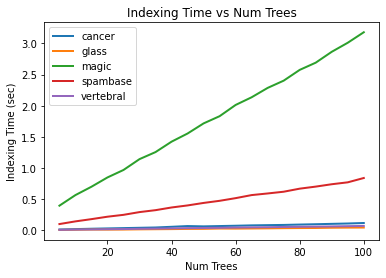

In [11]:
render_plot("n_trees", "init_time", "Num Trees", "Indexing Time (sec)", "Indexing Time vs Num Trees", "init_ntree.png")